<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
Saving Logistic Regression 1
Logistic Intercept: [-0.00043345]
training Score:0.698
testing Score:0.695
Done
count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        15

C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


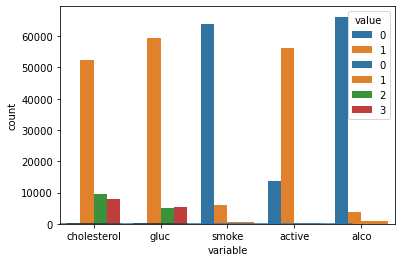

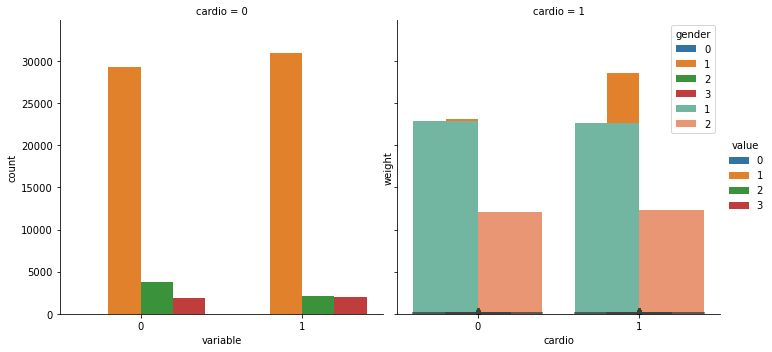

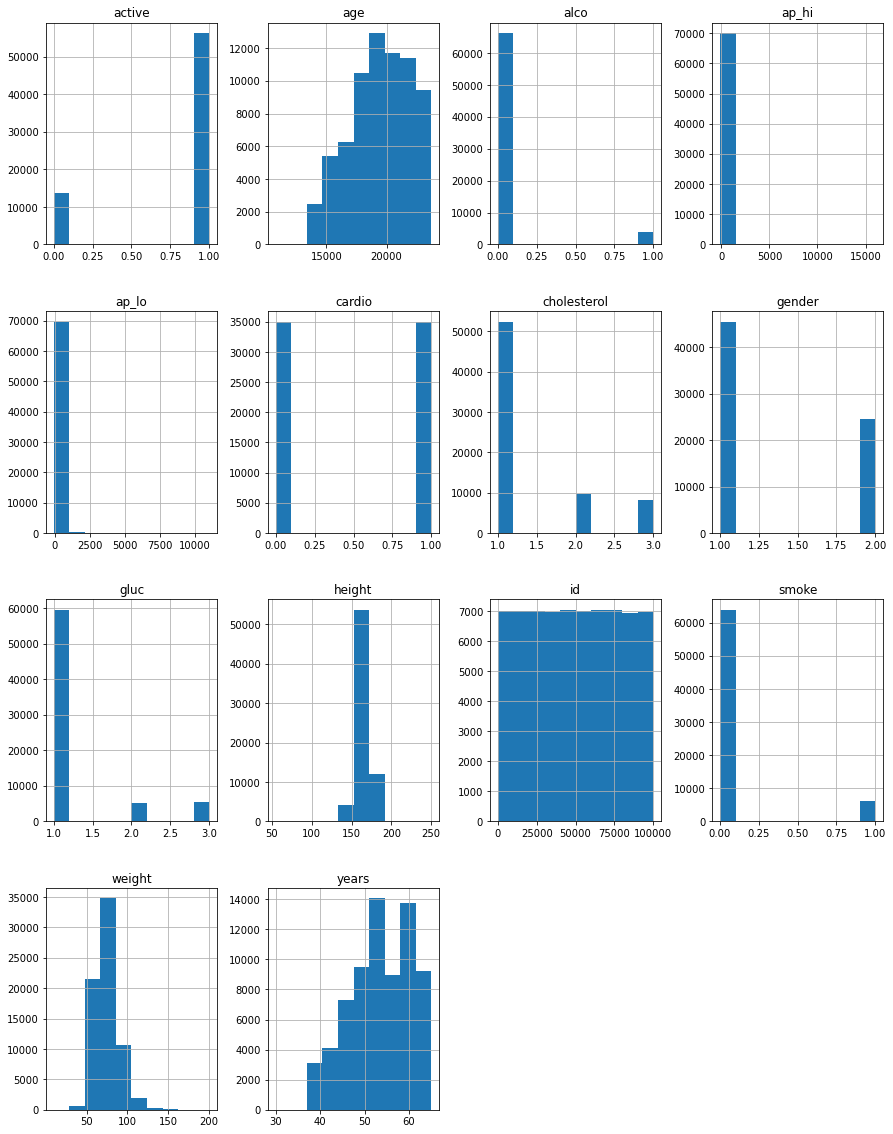

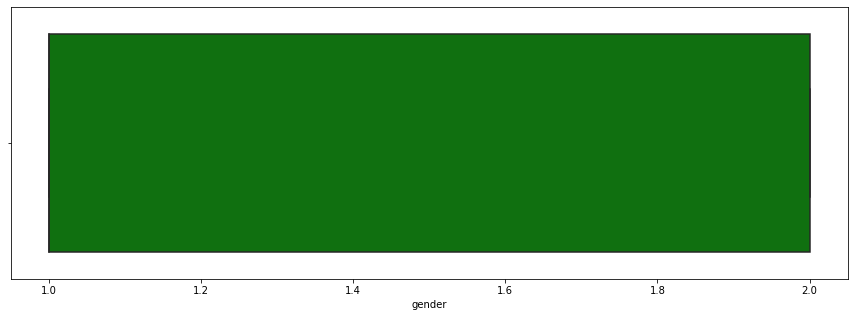

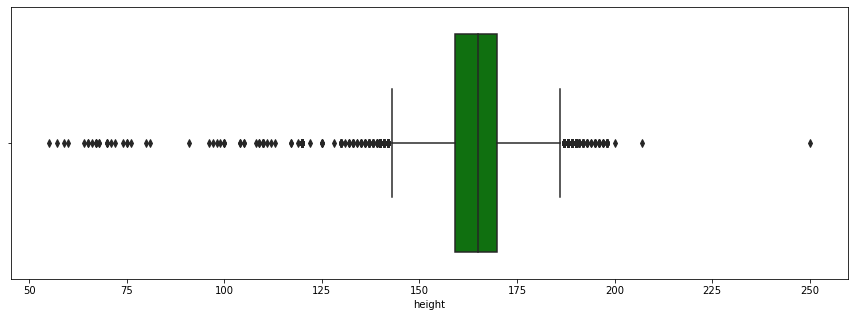

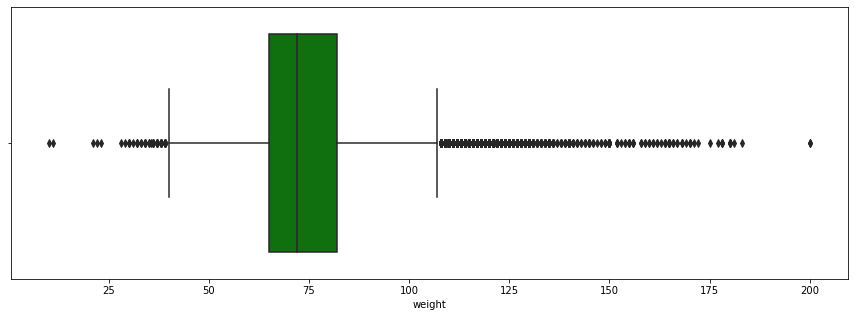

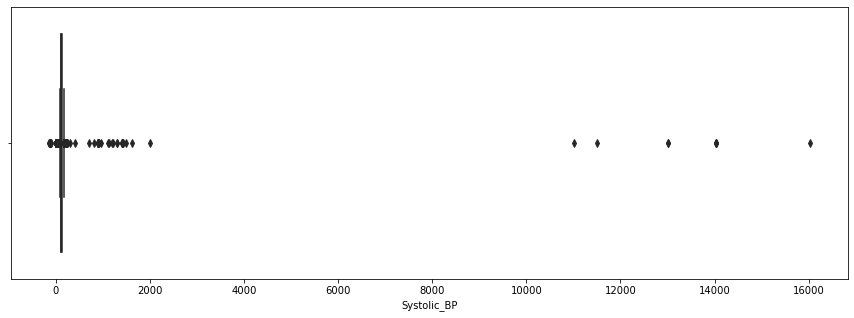

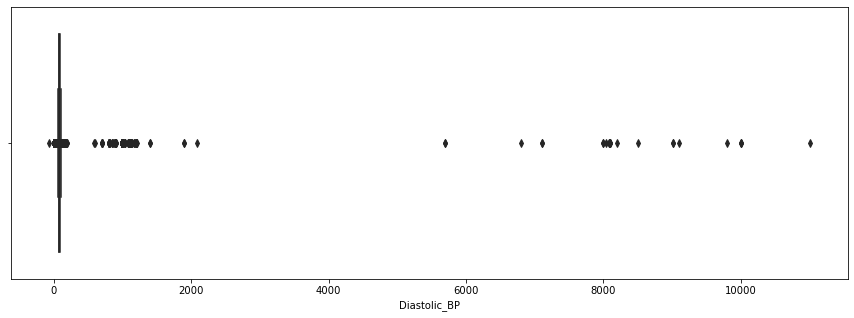

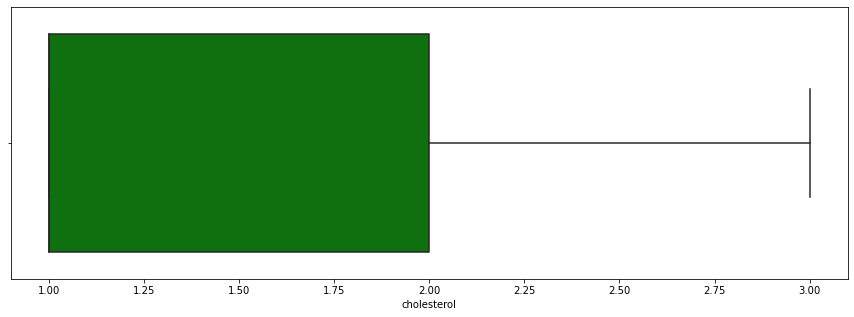

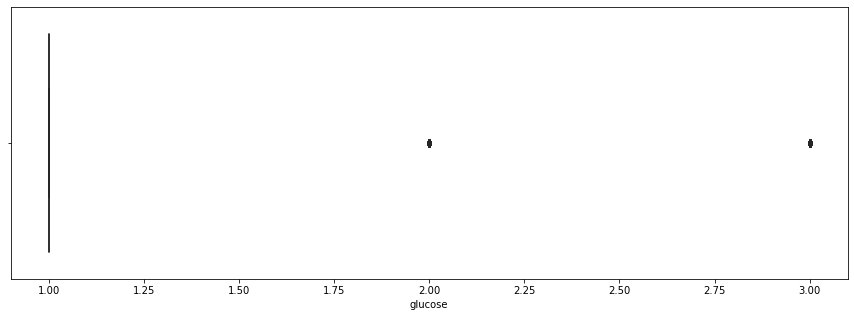

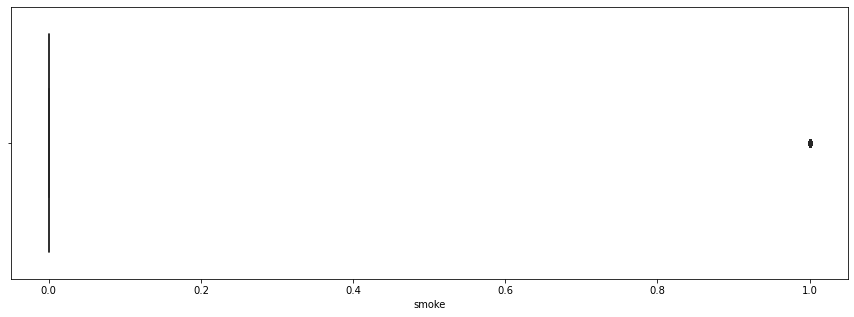

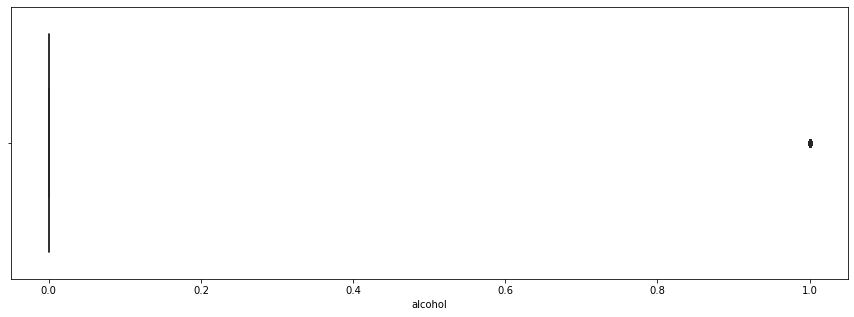

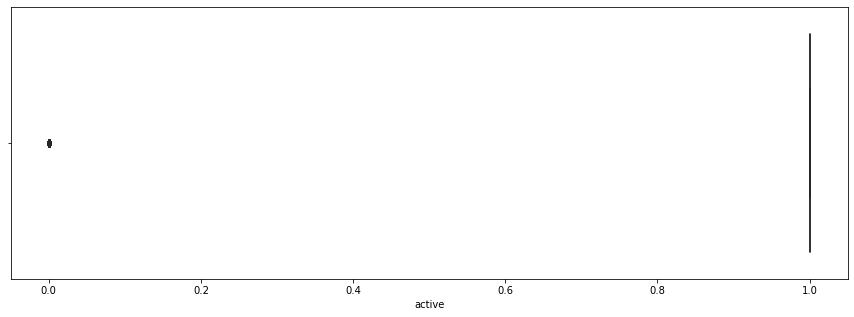

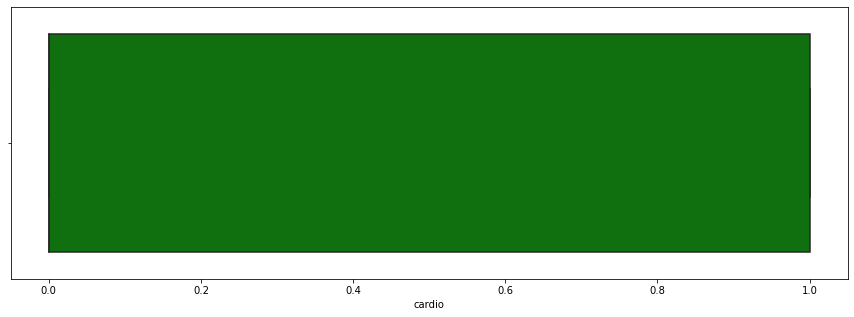

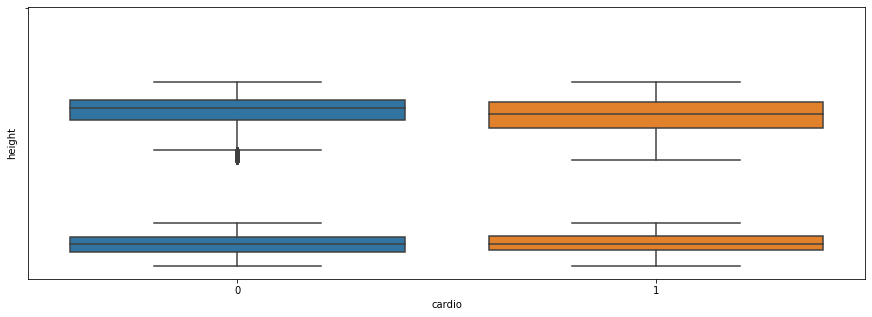

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[28]:


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# In[29]:

import pickle
import os
import pandas as pd
import numpy as np


# In[30]:


#os.chdir("C:/Users/ALI/Desktop/CLINTON/CIT/Project/Diseases Predictor/2 CVD/Old/Cardiovascular-Disease-Prediction-master")


# In[31]:


data = pd.read_csv("Data/cardio_train.csv", sep = ';')
# In[32]:
data.head()
#age is in days
# In[33]:
data.columns
# In[34]:
data.isnull().sum()
# In[13]:
data.info()
# In[14]:
data.describe()
# In[35]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
data['years'] = (data['age']/365).round().astype('int')
import seaborn as sns
sns.countplot(x = 'years', hue = 'cardio', data = data)
# we can see that from age of 55, the chances of having cvd increases.
## If we plot simple distplot of random numbers, we'll get normal distribution
x = np.random.randn(100)
norm_dist = sns.distplot(x)
sns.distplot(data['years'] )
sns.boxplot(x = 'cardio', y = 'years', data = data)
## We can see that people with cardio disease are older than people with no cardio disease
data.categorical = data.loc[:,['cholesterol','gluc','smoke','active','alco']]
data.categorical
pd.melt(data.categorical)
sns.countplot(x ='variable', hue ='value', data = pd.melt(data.categorical))
data_long = pd.melt(data, id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','active','alco'])
data_long
import seaborn as sns
sns.catplot(x = 'variable', hue = 'value', col = 'cardio', data= data_long, kind='count')
# You can see that people with CVD have higher glucose and cholesterol level(2,3), but smoke, activeness and alcohol level doesn't show us much difference.
# In[45]:
## In out data, the gender column has 1 and 2 values but we don't know which value represents male and female.
## So we'll calculate average height for both. And we'll assume that males are taller than females.
data['gender'].value_counts()
# In[46]:
sns.countplot(x = 'cardio', hue = 'gender', data = data, palette='Set2')
## gender vs cardio.. you can see the number of males and females for each value of cardio
# In[47]:
data['weight'].describe()
sns.boxplot(x = 'cardio', y = 'weight', data = data)
data.groupby('gender')['height'].mean()
# so males are 2 and females are 1
## Lets see who consumes more alcohol
data.groupby('gender')['alco'].sum()
data['cardio'].value_counts(normalize = True)
## Balanced data set cuz both values 1 and 0 are equally distributed in the dataset.
## Pandas Crosstab function to see if the dataset is balanced or not
pd.crosstab(data['gender'],data['cardio'])  ## use normalize to see the percentage of values
## Checking for correlations of all attibutes with the target variableb
data.corr()['cardio'].drop('cardio')
data.hist(figsize=(15,20))
## Renaming columns
data.columns = ['id', 'age','gender', 'height', 'weight', 'Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio', 'years']
data.head()
## Outliers check using BoxPlot
import matplotlib.pyplot as plt
columns = [ 'gender', 'height', 'weight', 'Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio', 'years']
for i in range(len(columns)):
    def check_outliers(i):
        fig,axes=plt.subplots(1,1)
        sns.boxplot(data=data,x=i, color='Green')
        fig.set_size_inches(15,5)
# In[59]:
for i in range(len(columns)):
    check_outliers(columns[i])
# We can see that height, weight, Systolic BP, Diastolic BP have outliers. Lets remove them.
# Also, year has one outlier.
# Also, we can see that, there are negative values of Systolic and Dialostic BP which doesn't make any sense.
# And, for some records, Systolic BP is less than Dialostic BP which is inappropriate. So we'll get rid of them too.


# In[60]:


from sklearn.model_selection import train_test_split

X = data.iloc[:,0:11]
y = data.iloc[:,12]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# In[61]:


from sklearn.linear_model import LogisticRegression


# In[62]:


logreg = LogisticRegression(max_iter=4000).fit(X_train,y_train)

print("Saving Logistic Regression 1")
filename = 'Logistic Regression 1.sav'
pickle.dump(logreg, open(filename, 'wb'))


# print the coefficients and model performance
print("Logistic Intercept:", logreg.intercept_)
print("training Score:{:.3f}".format(logreg.score(X_train, y_train)) )
print("testing Score:{:.3f}".format(logreg.score(X_test, y_test)) )
print("Done")


# In[ ]:


## Lets see results after we remove outliers


# In[63]:


## Lets remove the outliers form the mentioned columns: height,weight,systolic BP, Diastolic BP
print(data.height.describe())
data[data['height'] > 200]


# In[64]:


del data['age']


# In[65]:


ntive_BP_rows = data[data['Systolic_BP']<0]## we'll delete these records cuz BP can't be negative
ntive_BP_rows


# In[67]:


neg_dias_bp = data[data['Diastolic_BP']<0] # we'll delete this record cuz BP can't be negative
neg_dias_bp


# In[68]:


data = data[~(data['Systolic_BP']<0)]


# In[69]:


data = data[~(data['Diastolic_BP']<0)]


# In[70]:


data[data.Systolic_BP < 0] ## no more negative values of Systolic BP


# In[71]:


data[data.Diastolic_BP<0] # no more negative values of Diastolic BP


# In[72]:


data.shape


# In[73]:


## Lets remove height and weight values which are outliers

columns = ['height','weight']
for i in range(len(columns)):
    data.drop(data[(data[columns[i]] > data[columns[i]].quantile(0.975)) | (data[columns[i]] < data[columns[i]].quantile(0.025))].index,inplace=True)


# In[74]:


# Lets plot height and weight box plot again to check outliers

import seaborn as sns
sns.boxplot(x = 'cardio', y = 'weight', data = data)


# In[75]:


sns.boxplot(x = 'cardio', y = 'height', data = data)


# In[76]:


data.head()


# In[77]:


## Rearranging the columns to avoid wrong splitting
data = data[['years','gender', 'height', 'weight', 'Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio']]

data.head()


# In[78]:


from sklearn.model_selection import train_test_split

X = data.iloc[:,0:10]
y = data.iloc[:,11]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# In[79]:


X.head()


# In[80]:


y.head()


# In[81]:


## Now that we have cleaned our data little bit, lets check for accuracy again.



logreg = LogisticRegression(max_iter=4000).fit(X_train,y_train)

print("Saving Logistic Regression 2")
filename = 'Logistic Regression 2.sav'
pickle.dump(logreg, open(filename, 'wb'))


# print the coefficients and model performance
print("Logistic Intercept:", logreg.intercept_)
print("training Score:{:.3f}".format(logreg.score(X_train, y_train)) )
print("testing Score:{:.3f}".format(logreg.score(X_test, y_test)) )
print("Done")


# In[82]:


# Lets try using Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Saving Decision Tree Algorithm")
filename = 'Decision Tree Algorithm.sav'
pickle.dump(tree, open(filename, 'wb'))

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print("Done")


# In[83]:


# Lets try using Random Forest Algorithm

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

print("Saving Random Forest Algorithm")
filename = 'Random Forest Algorithm.sav'
pickle.dump(rnd_clf, open(filename, 'wb'))

y_pred = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Done")


# In[85]:


## AdaBoost Algorithm

from sklearn.ensemble import AdaBoostClassifier

ada_clf_DT = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf_DT.fit(X_train, y_train)

print("Saving AdaBoost Algorithm")
filename = 'AdaBoost Algorithm.sav'
pickle.dump(ada_clf_DT, open(filename, 'wb'))


# In[86]:


y_pred = ada_clf_DT.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Done")


# In[87]:


## Lets do feature engineering- adding a new column BMI= mass(kg)/height^2(meters)

data['BMI'] = data['weight']/(data['height']/100)**2


# In[88]:


data.head()


# In[89]:


#Rearranging columns again

data = data[['years','gender', 'height', 'weight', 'BMI','Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio']]


# In[90]:


from sklearn.model_selection import train_test_split

X = data.iloc[:,0:10]
y = data.iloc[:,11]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# In[91]:


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=4000).fit(X_train,y_train)

print("Saving Logistic Regression 3")
filename = 'Logistic Regression 3.sav'
pickle.dump(logreg, open(filename, 'wb'))

# print the coefficients and model performance
print("Logistic Intercept:", logreg.intercept_)
print("training Score:{:.3f}".format(logreg.score(X_train, y_train)) )
print("testing Score:{:.3f}".format(logreg.score(X_test, y_test)) )
print("Done")

# In[92]:


from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

print("Saving Random Forest Classifier")
filename = 'Random Forest Classifier.sav'
pickle.dump(rnd_clf, open(filename, 'wb'))

y_pred = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Done")

# In[93]:


from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Saving Decision Tree Classifier")
filename = 'Decision Tree Clasifier.sav'
pickle.dump(tree, open(filename, 'wb'))

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print("Done")


# In[94]:


data.head()


# In[95]:


## New column Obesity..
data['Obesity'] = 0


# In[96]:


data['Obesity'] = np.where(data['cholesterol']>2, 1, 0)



# In[97]:


data.head()


# In[98]:


## Rearranging columns

data = data[['years','gender', 'height', 'weight', 'BMI','Systolic_BP', 'Diastolic_BP',
       'cholesterol', 'glucose', 'Obesity','smoke', 'alcohol', 'active', 'cardio']]


# In[99]:


logreg = LogisticRegression(max_iter=4000).fit(X_train,y_train)

print("Saving Logistic Regression 4")
filename = 'Logistic Regression 4.sav'
pickle.dump(logreg, open(filename, 'wb'))

# print the coefficients and model performance
print("Logistic Intercept:", logreg.intercept_)
print("training Score:{:.3f}".format(logreg.score(X_train, y_train)) )
print("testing Score:{:.3f}".format(logreg.score(X_test, y_test)) )
print("Done")

print()